# Risk Assesment

In the second part we want to calculate a few risk values for each extracted scenario.
In detail this are the time-to-headway, time-to-collsion and enhanced time-to-collision measures.
Each risk is represented by a time value for each time step.
In general it states that the lower the time value is, the higher is the risk.
For each risk value we will also calculate the scenario risk which is for each risk measure simply defined as the lowest value during the scenario.

First of all some settings for reloading each import new before executing a cell have to be set again.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Next we have also to define the root directory meaning the absolute folder in which the repositroy was cloned again.

In [3]:
# root_dir = '/absolute/path/to/stanford-2019/'
root_dir = '../'

In [4]:
import os
import pandas as pd
from real_scenario import RealScenario

scenario_list = list()
data_dir = os.path.join(root_dir, 'extraction/data_all')
for i, file_name in enumerate(os.listdir(data_dir)):
    if i > 1000:
        break
    if file_name.split('.')[-1] == 'json':
        scenario_list.append(RealScenario(int(file_name.split('.')[0].split('_')[-1]), pd.read_json(os.path.join(data_dir, file_name))))


In [5]:
from risks import thw, ttc, ettc, ttr_thw, ttr_ttc

thw_min = list()
ttc_min = list()
ettc_min = list()

for scenario in tqdm(scenario_list):
    # calculate the risk values for each time step (that might take some time)
    scenario.calculate_risk(thw)
    scenario.calculate_risk(ttc)
    scenario.calculate_risk(ettc)

    # calculate the min values for the risk values
    scenario.calculate_risk_min()
    
    thw_min.append(scenario.thw_min_value)
    ttc_min.append(scenario.ttc_min_value)
    ettc_min.append(scenario.ettc_min_value)

0%|          | 2/1001 [00:04<39:11,  2.35s/it]/Users/kitty/GitRepos/RandomRepos/stanford-2019/assessment/risks.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  return (v_rel / a_rel) * (1 - math.sqrt(1 - 2 * a_rel * ttc_value / v_rel))
/Users/kitty/GitRepos/RandomRepos/stanford-2019/assessment/risks.py:69: RuntimeWarning: invalid value encountered in double_scalars
  return (v_rel / a_rel) * (1 - math.sqrt(1 - 2 * a_rel * ttc_value / v_rel))
100%|██████████| 1001/1001 [50:54<00:00,  3.05s/it]


In [8]:
all_risk_min = thw_min + ttc_min + ettc_min

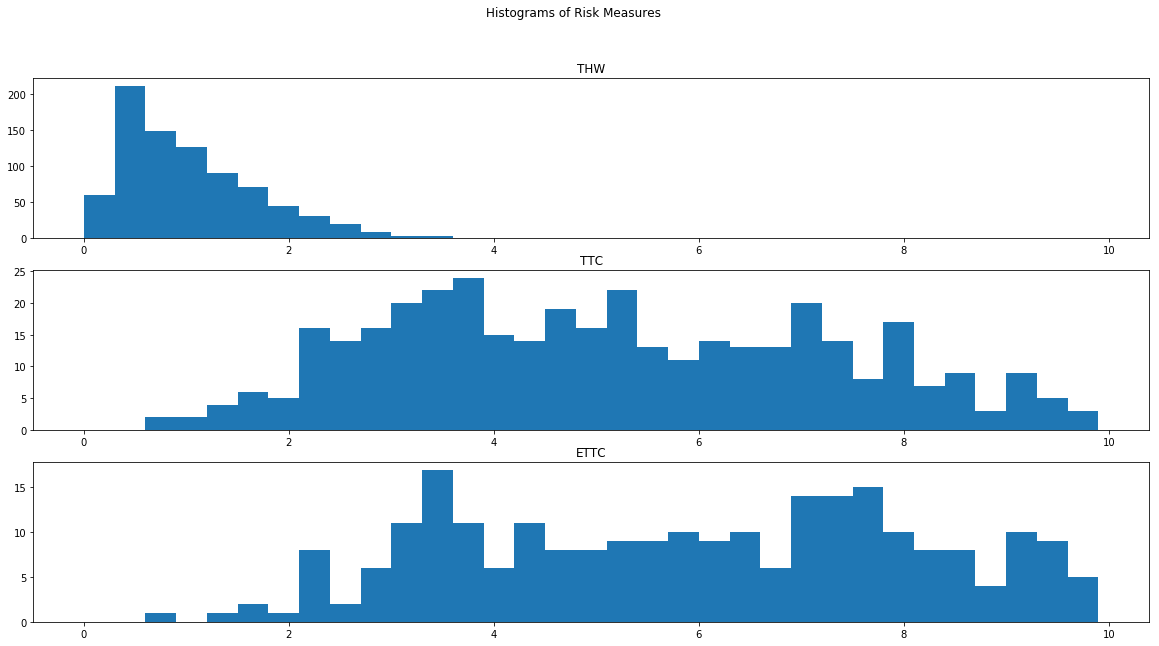

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(20, 10))
fig.suptitle('Histograms of Risk Measures')
#ax[0, 0].hist(np.array(all_risk_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
#ax[0, 0].set_title('All')

ax[0].hist(np.array(thw_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
ax[0].set_title('THW')

ax[1].hist(np.array(ttc_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
ax[1].set_title('TTC')

ax[2].hist(np.array(ettc_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
ax[2].set_title('ETTC')

pass

In [ ]:
thw_list_min = list()
for scenario in scenario_list:
    print('thw measure')
    print(scenario.thw_measure)
    print(scenario.thw_min_value)
    thw_list_min.append(scenario.thw_min_value)
    print(scenario.thw_min_time)
    print('')

In [13]:
for scenario in scenario_list:
    print('ttc measure')
    print(scenario.ttc_measure)
    print(scenario.ttc_min_value)
    print(scenario.ttc_min_time)
    print('')

e, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
-1
None

ttc measure
[15.831932773109223, 15.401639344262296, 14.999999999999995, 14.60156249999998, 14.121212121212125, 13.76296296296299, 13.42

In [22]:
ettc_min_list = list()
for scenario in scenario_list:
    print('ettc measure')
    print(scenario.ettc_measure)
    print(scenario.ettc_min_value)
    ettc_min_list.append(scenario.ettc_min_value)
    print(scenario.ettc_min_time)
    print('')

ettc measure
[4.399570087532136, 4.373303395253021, 4.336260645077149, 4.304684900477835, 4.263085592149573, 4.227873705474761, 4.1869348071673596, 4.143651246449118, 4.1052111519721475, 4.063686376195042, 4.022741957464347, 3.9795468806707657, 3.939217140531839, 3.8955510831671556, 3.8525144789293715, 3.808612725206368, 3.7669273196628263, 3.722893209891514, 3.6745376648889443, 3.6348236817141477, 3.5885138849404203, 3.54598457418746, 3.5049213279512608, 3.4610619269047924, 3.4181795936073183, 3.3747942495989407, 3.335762346721128, 3.2930012997356775, 3.251557474963347, 3.206009910900412, 3.167566898191768, 3.125593244783783, 3.084232225471953, 3.044064565947521, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [11]:
for scenario in scenario_list:
    print('ttr_thw measure')
    print(scenario.ttr_thw_measure)
    print(scenario.ttr_thw_min_value)
    print(scenario.ttr_thw_min_time)

ne, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
-4.115138935183785
0.04
ttr_thw measure
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [8]:
for scenario in scenario_list:
    print('ttr_ttc measure')
    print(scenario.ttr_ttc_measure)
    print(scenario.ttr_ttc_min_value)
    print(scenario.ttr_ttc_min_time)
    print('')

ttr_ttc measure
[395.07885006470696, 443.7630684969495, 443.6643569844789, 506.3961830852073, 506.2841709537, 589.7567405355494, 589.7168513388735, 589.5913621262458, 706.5492529053679, 706.5088544548975, 706.2690094078582, 706.1269911504424, 706.087721238938, 705.945218352681, 705.8033149171271, 588.6811774461028, 588.5532228360956, 588.4269740474874, 504.77641122674225, 504.66612763272065, 441.92798013245033, 441.82380722559293, 441.7835424710425, 392.9313292884721, 392.83363959328676, 392.7354453627181, 353.7081587651599, 353.61611570247936, 353.47534435261707, 321.54700640768925, 321.4636363636364, 321.3768021625951, 321.29056386651325, 321.1600290188623, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
np.array(scenario.ttr_ttc_measure, dtype=np.float)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(array([41.,  2.,  9.,  6.,  4.,  5.,  3.,  4.,  3.,  1.]),
 array([-1.        ,  0.76196184,  2.52392369,  4.28588553,  6.04784738,
         7.80980922,  9.57177106, 11.33373291, 13.09569475, 14.85765659,
        16.61961844]),
 <a list of 10 Patch objects>)

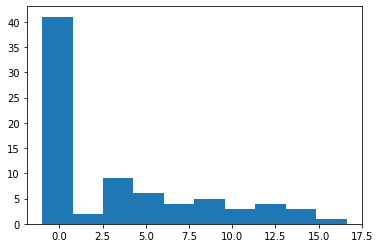

In [23]:
plt.hist(np.array(ettc_min_list, dtype=np.float))